# Sentiment Analysis Of News Articles
CMSC320 Final Project
Author : Shin Mitsuno

<img src="advertisements-batch-blur-business-518543.jpg" style="width: 600px;" />

# Introduction

As students, we have to read the news more, but it seems like even though the news of the world is becoming more and more accessible, people still aren't as informed as they should be. I chose to do data analysis on news articles found online because I'm also guilty of not reading the news enough. However as more news becomes accessible, problems like fake news, and the spreading of news meant to manipulate peoples views also spread. I also felt that news articles were good for analysis become data is abundant, yet challenging to analyze. 

Data source : News articles from RSS feeds

We start by creating a list of possible news sources to extract articles from. For the sake of this project we will choose 6 news sources, that also have RSS feeds. RSS stands for "Really Simple Syndication" and it is a type of web feed. This data is formatted as a XML file, which allows for different machines to easily read in its data. Larger news sites have RSS news feeds that typically have the most recent news articles uploaded to the news site. Other websites will often read data from this RSS feed to upload onto their own site. We will parse data through these RSS feeds.

Read more about RSS feeds here : 
* https://rss.com/blog/how-do-rss-feeds-work/

Now that we know the format of the data we will be working with, lets dive into the data sources.
We will pull data from the following news sites : 
* BBC 
* CNN
* Buzzfeed
* CNBC
* Huffington Post
* The Guardian

These news sites were selected because they had a RSS feed for various categories of news. Take a look at the links from BBC below.

### BCC news (https://www.bbc.com/news)
BCC news has several categories of RSS urls, such as Business, Politics, Health, etc ...

* RSS feed (Business) : http://feeds.bbci.co.uk/news/business/rss.xml
* RSS feed (Politics) : http://feeds.bbci.co.uk/news/politics/rss.xml
* RSS feed (Health) : http://feeds.bbci.co.uk/news/health/rss.xml
* RSS feed (Education & Family) : http://feeds.bbci.co.uk/news/education/rss.xml
* RSS feed (Science & Environment) : http://feeds.bbci.co.uk/news/science_and_environment/rss.xml
* RSS feed (Technology) : http://feeds.bbci.co.uk/news/technology/rss.xml
* RSS feed (Entertainment & Arts) : http://feeds.bbci.co.uk/news/entertainment_and_arts/rss.xml

Some news sites did not have certain categories, so there may be more articles in certain categories, as we will see later on with the data visualization section.
There are many links for each of the 6 news sites, so one way to store these links to be scraped later on is in a format called JSON. JSON, or JavaScript Object Notation, is a data file format where the data is stored with a series of keys and values. JSON is widely used in many applications of the field. We have created a JSON file to store all of the RSS links, in a manner shown below

Read more about JSON here : 
* https://www.json.org/json-en.html

Snippet of news links json file
```json
{
  "bbc": {
    "rss": {
      "business": "http://feeds.bbci.co.uk/news/business/rss.xml",
      "politics": "http://feeds.bbci.co.uk/news/politics/rss.xml",
      "health": "http://feeds.bbci.co.uk/news/health/rss.xml",
      "education": "http://feeds.bbci.co.uk/news/education/rss.xml",
      "science": "http://feeds.bbci.co.uk/news/science_and_environment/rss.xml",
      "technology": "http://feeds.bbci.co.uk/news/technology/rss.xml",
      "entertainment": "http://feeds.bbci.co.uk/news/entertainment_and_arts/rss.xml"
    },
    "homepage": "http://www.bbc.com/"
  },
  "cnn": {
    "rss": {
      "business": "http://rss.cnn.com/rss/money_latest.rss",
      "politics": "http://rss.cnn.com/rss/cnn_allpolitics.rss",
      "health": "http://rss.cnn.com/rss/cnn_health.rss",
      "technology": "http://rss.cnn.com/rss/cnn_tech.rss",
      "entertainment": "http://rss.cnn.com/rss/cnn_showbiz.rss"
    }
    
   ... plus more links
}```


# Getting started

We will begin by installing the necessary dependencies for this project. We will install packages that will help us with data collection, data management, data cleaning, data analysis and explanatory analysis.Below is a brief explanation of each of the packages we will use. Click the link to read more about the package or module. 

| package | summary | link |
|------|------|------|
|numpy| python package for fast computations on large arrays and matrices| https://numpy.org/ |
|pandas| python package for data analysis and manipulation | https://pandas.pydata.org/ |
|feedparser| python module for downloading and parsing syndicated feeds| https://pypi.org/project/feedparser/|
|newspaper| python package for fast computations on large arrays and matrices| https://pypi.org/project/feedparser/ |
|datetime|  python module for manipulating dates and times| https://docs.python.org/3/library/datetime.html |
|seaborn| python data visualization library, based on matplotlib| https://seaborn.pydata.org/ |
|matplotlib| python plotting library for generating graphs and plots| https://matplotlib.org/|
|json| python package for json data manipulation| https://docs.python.org/3/library/json.html |
|TextBlob| python library for processing text| https://textblob.readthedocs.io/en/dev/|


In [352]:
# Install/Import Dependencies and Modules
!pip install feedparser
!pip install newspaper3k
!pip install seaborn
!pip install textblob


import pprint
import feedparser as fp
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import newspaper
import pandas as pd
import numpy as np
from newspaper import Article
from time import mktime
from datetime import datetime
from collections import Counter
from textblob import TextBlob
import nltk

## Data Collection

After setting up our environment, we can now use the tools to begin working with the data. The first thing we need to do is collect it! Often times in class, we are given a clean table of data to work with, but we will start with the process of collecting the data from the internet. 

The overview of the process for data collection is this: 
1. Open and read the json file containing the news sites and rss links(news_links.json) and save
2. For each news site, loop through the rss links 
3. For each RSS link, do the following 
  1. Use feedparser to parse rss data
  2. For every article found in the rss feed, scrape the article. Read more about what is scraped here (https://newspaper.readthedocs.io/en/latest/)
  3. Save parts of the data we want, like title, content, published date ... into a pandas dataframe
4. Save the dataframe to a csv file

CSV, or Comma Separated Values, is similar to JSON in that it is essentially a format for storing data. The data in CSV files are stored like a table, but the data is separated by commas.

Read more about CSV here : 
* https://en.wikipedia.org/wiki/Comma-separated_values

We save the data we collected to a csv file because if we ran the data collection script everytime we wanted to work with the data, it would be very time consuming. By saving the data to a csv file, we can read the csv file for the data, and it would also allow us to distribute the data if needed as well. 

We will create a helper function called `export_to_csv` to csv to store our dataframe table as a csv file. This method is not neccesary, but I worte this small function to generate csv files with a custom file name.

In [353]:
#Takes a pandas dataframe as an argument 
#Exports dataframe to excel, with unique timestamp included in file name
#Returns nothing
def export_to_csv(df):
    currtime = str(pd.datetime.now()).replace(" ", '_') #replace space inbetween date and time with _
    file_name = 'news_articles_'+ currtime + '.csv'
    df.to_csv(file_name, sep=',')
    
    
#Define limit for number of articles to be extracted
ARTICLE_LIMIT = 1000
#dataframe columns
news_data_columns = ['category', 'url', 'title', 'content', 'authors', 'company','date_published']
#Initialize dataframe that holds news data 
news_data = pd.DataFrame(columns = news_data_columns)

# Loads the JSON files with news sites
with open('news_links.json') as data_file:
    news_companies = json.load(data_file)
    

We will begin retrieving the data.

In [354]:
article_count = 1
# Iterate through each news company
for company, links in news_companies.items():
    current_company = company #current company we are looking at
    
    #Iterate through rss links 
    #Key: Category Value : RSS URL
    for category, rss_url in links['rss'].items():
#         print(f"The category is {category}")
#         print(f"The URL is {rss_url}")
        d = fp.parse(rss_url) #parse the rss url

        for entry in d.entries:
            # Skip article if it has no publish data
            if hasattr(entry, 'published'):
                if article_count > ARTICLE_LIMIT:
                    break
                url = entry.link
                date = entry.published_parsed
                date_published = datetime.fromtimestamp(mktime(date)).isoformat()
                try:
                    post = Article(entry.link)
                    post.download()
                    post.parse()
                except Exception as e:
                    #for any reason if an error(exception) comes up when downloading the article
                    #We want to skip this one and continue to the next article
                    print(e)
                    print("We will skip this article and continue...")
                    continue
                
                title = post.title
                content = post.text
                authors = ",".join(post.authors) #post.authors returns list so convert to string
                
                #row to add to dataframe, one article. All elements in row are strings 
                article_row = [category, url, title, content, authors, current_company, date_published]
                news_data.loc[len(news_data)] = article_row #add new row to dataframe
    
#                 print(article_count, "articles downloaded from", current_company, ", url: ", url)
#                 print(title)
                article_count += 1
        article_count = 1
        
#Save dataframe to external csv file.
export_to_csv(news_data)

display(news_data)

,category,url,title,content,authors,company,date_published
0,business,https://www.bbc.co.uk/news/uk-50807348,BA strike threat removed after pilot pay deal,Image copyright Getty Images\n\nBritish Airway...,,bbc,2019-12-16T17:43:52
1,business,https://www.bbc.co.uk/news/world-africa-50812616,Top tech firms sued over DR Congo cobalt minin...,Image copyright AFP Image caption Artisanal mi...,,bbc,2019-12-16T19:13:03
2,business,https://www.bbc.co.uk/news/business-50807879,Pre-Christmas shopping discounts 'could hit 50%',Image copyright Getty Images\n\nSales discount...,,bbc,2019-12-16T16:31:43
3,business,https://www.bbc.co.uk/news/business-50806745,Workers secure fresh victory over Post Office,Media playback is unsupported on your device M...,,bbc,2019-12-16T16:47:43
4,business,https://www.bbc.co.uk/news/business-50814766,Shares surge as political and trade tensions ease,Image copyright Getty Images\n\nUK shares rose...,,bbc,2019-12-16T17:58:27
...,...,...,...,...,...,...,...
1105,technology,https://www.theguardian.com/technology/2019/no...,Echo Dot with Clock: Amazon's cheap Alexa alar...,Amazon has a new twist on its popular cut-pric...,Samuel Gibbs,theguardian,2019-11-12T07:00:33
1106,technology,https://www.theguardian.com/business/2019/nov/...,Google snaps up Fitbit for $2.1bn,Takeover allows web giant to take on Apple in ...,Kalyeena Makortoff,theguardian,2019-11-01T15:26:19
1107,technology,https://www.theguardian.com/commentisfree/2019...,These new rules were meant to protect our priv...,Who owns your data? This is one of the toughes...,Stephanie Hare,theguardian,2019-11-10T08:30:28
1108,technology,https://www.theguardian.com/technology/askjack...,Can DuckDuckGo replace Google search while off...,So is DuckDuckGo no good? Surprised you did no...,Jack Schofield,theguardian,2019-12-12T08:00:01


# Data cleaning

This is a process that is often overlooked in classes, since we are often given a clean dataset to work with. However, an important part of data science is "cleaning" the data.
Data cleaning is the culmination of several components like:
1. Remove rows that are missing critical values
2. Fill missing cells with NaN or some other value to denote that it is missing
3. Filter other dirty data 

Looking at our dataframe, we can see that one column has a lot of blank cells.
The authors column of our dataframe seems to be missing authors names, most likely due to the fact that the parser and scraper was unable to determine who the authors of the article were. This makes sense, since  news sites may write the author in various parts of the article, and since there is no standardized format for doing so, the scraper missed it. 

We will clean this data by replacing blank cells in the data with "NaN" values.
In pandas we use "NaN" values to denote that the value is missing.
Read more on NaN(missing) values here : 
* https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

A lot of work goes into cleaning and preparing the data. You might need to think about what kind of dataset you are working with and decide what you think makes your data incomplete or "dirty".
Read more about it here : 
* https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4

In [355]:
#Replace all blank cell values with NaN values
news_data = news_data.replace(r'^\s*$', np.nan, regex=True)
news_data

,category,url,title,content,authors,company,date_published
0,business,https://www.bbc.co.uk/news/uk-50807348,BA strike threat removed after pilot pay deal,Image copyright Getty Images\n\nBritish Airway...,NaN,bbc,2019-12-16T17:43:52
1,business,https://www.bbc.co.uk/news/world-africa-50812616,Top tech firms sued over DR Congo cobalt minin...,Image copyright AFP Image caption Artisanal mi...,NaN,bbc,2019-12-16T19:13:03
2,business,https://www.bbc.co.uk/news/business-50807879,Pre-Christmas shopping discounts 'could hit 50%',Image copyright Getty Images\n\nSales discount...,NaN,bbc,2019-12-16T16:31:43
3,business,https://www.bbc.co.uk/news/business-50806745,Workers secure fresh victory over Post Office,Media playback is unsupported on your device M...,NaN,bbc,2019-12-16T16:47:43
4,business,https://www.bbc.co.uk/news/business-50814766,Shares surge as political and trade tensions ease,Image copyright Getty Images\n\nUK shares rose...,NaN,bbc,2019-12-16T17:58:27
...,...,...,...,...,...,...,...
1105,technology,https://www.theguardian.com/technology/2019/no...,Echo Dot with Clock: Amazon's cheap Alexa alar...,Amazon has a new twist on its popular cut-pric...,Samuel Gibbs,theguardian,2019-11-12T07:00:33
1106,technology,https://www.theguardian.com/business/2019/nov/...,Google snaps up Fitbit for $2.1bn,Takeover allows web giant to take on Apple in ...,Kalyeena Makortoff,theguardian,2019-11-01T15:26:19
1107,technology,https://www.theguardian.com/commentisfree/2019...,These new rules were meant to protect our priv...,Who owns your data? This is one of the toughes...,Stephanie Hare,theguardian,2019-11-10T08:30:28
1108,technology,https://www.theguardian.com/technology/askjack...,Can DuckDuckGo replace Google search while off...,So is DuckDuckGo no good? Surprised you did no...,Jack Schofield,theguardian,2019-12-12T08:00:01


# Data visualization
Now, our data is ready to be analyzed. 
We will start with a process called data visualization. When we look at our data as a table, it's hard to see what our data looks like since there is so much data. For example, just seeing simple things like how many articles we have from each news site is hard to see just by looking at the data. We will begin our exploratory anaysis by visualizing information extracted from the table, in hopes that it will lead us make various conclusions of the data.

## What we will plot 
For clarity, we will list the various things plotted in this section 
1. bar plot of company article count
2. bar plot of article count per category
3. Average article length across all categories
4. Average article length for each news site

There will be snippets of text to briefly discuss the plot and possible implications. 

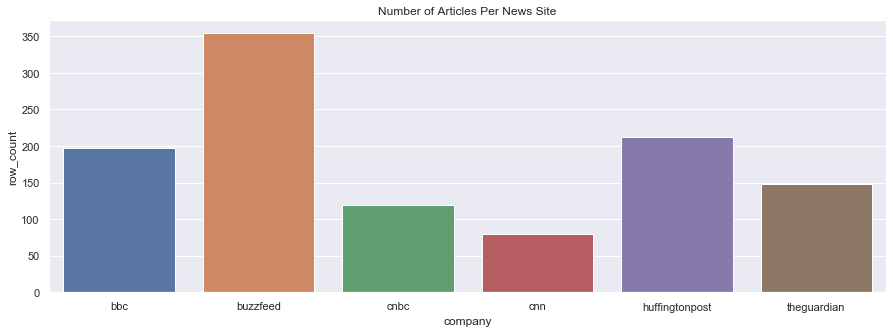

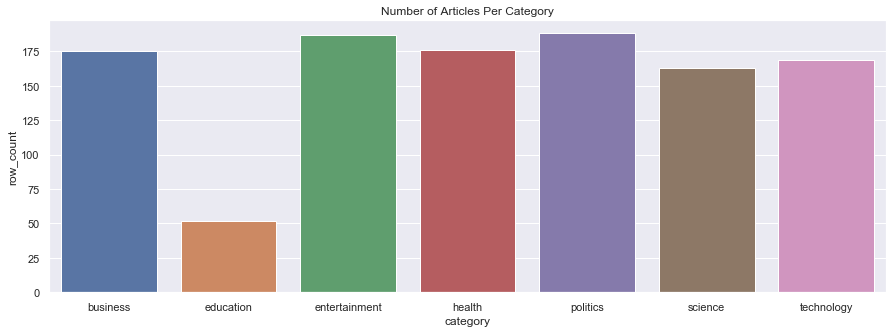

In [356]:
# news_data.read_csv()
#1
#create a dataframe for article count for news site
import matplotlib.pyplot as plt
overview_df = news_data.copy(deep=True)
sns.set(rc={'figure.figsize':(15,5)})

company_df = overview_df.groupby('company')
company = list(company_df.groups.keys())
count = list(company_df.size())
percentage =  list(map(lambda x: round((x/sum(count))*100, 3), count)) # percentage of total article count
company_df = pd.DataFrame(list(zip(company, count, percentage)), columns =['company', 'row_count', 'percentage']) 
company_bar_plot = sns.barplot(x="company", y="row_count", data=company_df).set_title('Number of Articles Per News Site')
#display the bar plot of company article count
plt.show()

#2
#create a dataframe for article count for each category
overview_df = overview_df.groupby('category')
category = list(overview_df.groups.keys())
count = list(overview_df.size())
percentage =  list(map(lambda x: round((x/sum(count))*100, 3), count)) # percentage of total article count
overview_df = pd.DataFrame(list(zip(category, count, percentage)), columns =['category', 'row_count', 'percentage']) 
overview_bar_plot = sns.barplot(x="category", y="row_count", data=overview_df).set_title('Number of Articles Per Category')
#display the bar plot of article count per category
plt.show()


Looking at the first barplot, titled "Number of Articles Per News Site", we can see that the number of articles we extracted from each site differs. We see that buzzfeed news has the most articles, and cnn having the lowest. Because our dataset is relatively small, we may need to keep in mind that certain news sites have more articles, and thus more weight in the data. 
Looking at the second barplot titled "Number of Articles Per Category", we see that one category(education) has significantly less articles than the other ones. If we were doing analysis based on categories, we need to keep in mind that this category has a smaller sample set than the rest. Other than that, the number of articles per catefgory seems to be pretty evenly distributed.

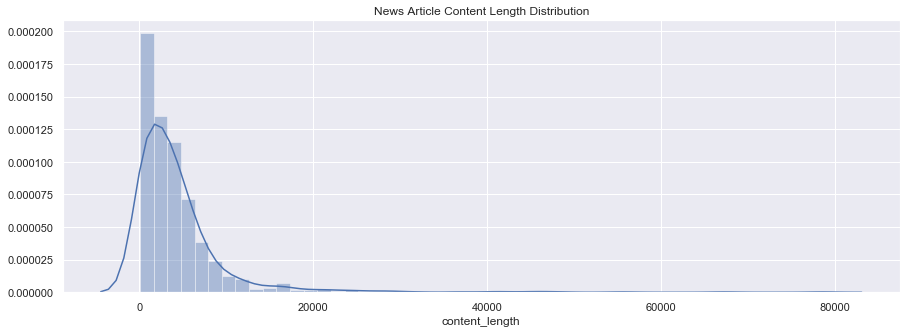

Average article length across all categories is 4368.546846846847


In [357]:
#3
# Distribution of article size 
# add a column for the content length for each article
news_data['content_length'] = news_data['content'].str.len()
sns.distplot(news_data['content_length']).set_title('News Article Content Length Distribution');
plt.show()
print(f"Average article length across all categories is {news_data['content_length'].mean()}")

Above, we see that distibution of news article content lengths. The average character count of these articles is about 4273.

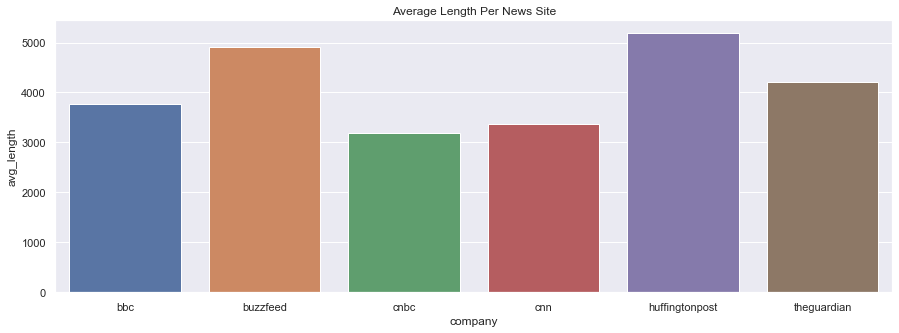

In [358]:
#4
# Average article length for each news site
avg_length_df = news_data.groupby('company')['content_length'].mean()
company = news_data.groupby('company')
company = list(company.groups.keys())
avg_len = list(avg_length_df)
avg_length_df
avg_length_df = pd.DataFrame(list(zip(company, avg_len)), columns =['company', 'avg_length']) 
avg_bar_plot = sns.barplot(x="company", y="avg_length", data=avg_length_df).set_title('Average Length Per News Site')
#display the bar plot of company article count
plt.show()

# Exploratory Analysis 
We will do some exploratory analysis of the data by first deriving more data from the data we already have.
One type of analysis we will focus on today is setiment analysis. Sentiment analysis involves the mining of text, and extracting various subjective information out of it. Sentiment analysis is part of a larger field known as Natural Language Processing(NLP). The field is primarily concerned with the interaction between humans and computers and how computers can analyze the languages we speak.
We will be doing a sentiment analysis of the article's summary and the article's content. The summary for the article is generated with the Artical module from the newscraper package listed in the "Getting started" section of the notebook. 

Read more about sentiment analysis here: 
* https://towardsdatascience.com/sentiment-analysis-concept-analysis-and-applications-6c94d6f58c17

We refer to "sentiment" of some text as the "contextual polarity" of it. What this essentially means is, quantitatively, what is the emotional effect that this text has. The numerical value of sentiment is between the values of -1 and 1. Here is what the value means : 
1. If the value is less than 0, the text is considered negative
2. If the value is greater than 0, the text is considered positive
3. If the value is equal to 0, the text is neutral
How positive or negative the text is depends on the value.

We use a module called TextBlob, for text processing. Using this library, we are able to easily obtain the sentiment value of text.

Read more about TextBlog here : 
* https://textblob.readthedocs.io/en/dev/

In [359]:
# We will do further analysis on the article content to better understand the data
# We will also add information to our dataframe
from collections import Counter
!pip install textblob

from textblob import TextBlob
import nltk

content_summaries = list()
most_common_words = list()
keywords = list()
sentiment_of_summary = list()
sentiment_of_content = list()

for link in news_data['url']:
    # For each link, create Article instance and extract more data
    try:
        article = Article(link)
        article.download()
        article.parse()
        
        #Additional analysis 
        
        #Perform Natural Language Processing 
        article.nlp()
        
        title = article.title
        content = article.text
        
        #column for content summary 
        content_summary = article.summary
        content_summaries.append(content_summary)
#         print(content_summary)
        
        #column for key words
        keyword = article.keywords
        keywords.append(keyword)
        
        #column for most frequent words
        words = content.split() 
        count = Counter(words) 
        most_occur = count.most_common(10)# 10 most common words in text
        most_common_words.append(most_occur) #insert list of tuples
        
        #Do sentiment analysis on on both the title and content

        #sentiment of title
        summary_obj = TextBlob(content_summary)
        #Sentiment is between values -1.0 and 1.0
        summary_sentiment = summary_obj.sentiment.polarity
        sentiment_of_summary.append(summary_sentiment)
#         print("The sentiment is of summary is : ", summary_sentiment)

        #sentiment of content
        content_obj = TextBlob(content)
        #Sentiment is between values -1.0 and 1.0
        content_sentiment= content_obj.sentiment.polarity
        sentiment_of_content.append(content_sentiment)

#         print("The sentiment is of the content is : ", content_sentiment)
        
    except Exception as e:
        #for any reason if an error(exception) comes up when downloading the article
        #We want to skip this one and continue to the next article
        print(e)
        print("We will skip this article and continue...")
        continue

news_data['content_summaries'] = content_summaries
news_data['most_common_words'] =most_common_words
news_data['keywords'] = keywords
news_data['sentiment_of_summary'] = sentiment_of_summary
news_data['sentiment_of_content'] = sentiment_of_content

news_data
#average sentiment of each news company

,category,url,title,content,authors,company,date_published,content_length,content_summaries,most_common_words,keywords,sentiment_of_summary,sentiment_of_content
0,business,https://www.bbc.co.uk/news/uk-50807348,BA strike threat removed after pilot pay deal,Image copyright Getty Images\n\nBritish Airway...,NaN,bbc,2019-12-16T17:43:52,952,Image copyright Getty ImagesBritish Airways pi...,"[(a, 8), (the, 6), (BA, 5), (pilots, 4), (over...","[strike, welcome, pilots, removed, ba, flights...",0.400000,0.212397
1,business,https://www.bbc.co.uk/news/world-africa-50812616,Top tech firms sued over DR Congo cobalt minin...,Image copyright AFP Image caption Artisanal mi...,NaN,bbc,2019-12-16T19:13:03,2276,Image copyright AFP Image caption Artisanal mi...,"[(the, 18), (and, 11), (of, 11), (to, 10), (in...","[cobalt, congo, sued, companies, lawsuit, cong...",-0.150000,-0.032813
2,business,https://www.bbc.co.uk/news/business-50807879,Pre-Christmas shopping discounts 'could hit 50%',Image copyright Getty Images\n\nSales discount...,NaN,bbc,2019-12-16T16:31:43,3345,"Deloitte, which has monitored the prices of 80...","[(the, 27), (to, 19), (of, 13), (and, 11), (a,...","[discounts, discounting, shops, 50, christmas,...",0.075505,0.069939
3,business,https://www.bbc.co.uk/news/business-50806745,Workers secure fresh victory over Post Office,Media playback is unsupported on your device M...,NaN,bbc,2019-12-16T16:47:43,4949,Hundreds of post office workers have won a key...,"[(the, 43), (of, 21), (to, 19), (and, 18), (in...","[post, office, high, shortfalls, walk, workers...",0.040000,0.021685
4,business,https://www.bbc.co.uk/news/business-50814766,Shares surge as political and trade tensions ease,Image copyright Getty Images\n\nUK shares rose...,NaN,bbc,2019-12-16T17:58:27,2233,Image copyright Getty ImagesUK shares rose aga...,"[(the, 17), (and, 12), (to, 11), (on, 8), (a, ...","[phase, political, china, agreement, surge, ro...",0.174876,0.161968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,technology,https://www.theguardian.com/technology/2019/no...,Echo Dot with Clock: Amazon's cheap Alexa alar...,Amazon has a new twist on its popular cut-pric...,Samuel Gibbs,theguardian,2019-11-12T07:00:33,4451,The Echo Dot with Clock is one of those true R...,"[(the, 42), (and, 20), (to, 18), (a, 17), (you...","[small, echo, dot, cheap, alarms, clock, repla...",0.157744,0.174184
1106,technology,https://www.theguardian.com/business/2019/nov/...,Google snaps up Fitbit for $2.1bn,Takeover allows web giant to take on Apple in ...,Kalyeena Makortoff,theguardian,2019-11-01T15:26:19,4354,Google is paying cash for the San Francisco-ba...,"[(the, 27), (and, 26), (to, 23), (in, 15), (Fi...","[googles, data, google, information, business,...",0.225000,0.176576
1107,technology,https://www.theguardian.com/commentisfree/2019...,These new rules were meant to protect our priv...,Who owns your data? This is one of the toughes...,Stephanie Hare,theguardian,2019-11-10T08:30:28,6849,"Not what we were promised last year, when the ...","[(the, 61), (of, 40), (to, 38), (is, 26), (and...","[companies, privacy, work, meant, hare, data, ...",-0.092667,0.084142
1108,technology,https://www.theguardian.com/technology/askjack...,Can DuckDuckGo replace Google search while off...,So is DuckDuckGo no good? Surprised you did no...,Jack Schofield,theguardian,2019-12-12T08:00:01,8791,Google Search soon became one of the web’s cat...,"[(and, 37), (the, 33), (to, 31), (a, 30), (sea...","[advertising, search, privacy, offering, resul...",0.111111,0.147377


## Exploratory Analysis Cont.. with data visualization
Now that we have added more data to the table, lets plot it.
We first add 2 columns to classify if the summary and content was positive, negative or neutral.
Then we continue with data visualization
For clarity, the plots are listed below:
1. Average sentiment for each news site(article summary) 
2. Average sentiment for each news site(article content) 
3. Average sentiment for each news category (article summary) 
4. Average sentiment for each news category (article content) 
5. Ratio of positive, negative or neutral articles in each news company(article summary) 
6. Ratio of positive, negative or neutral articles in each news company(article content) 


In [360]:
# Add column to classify text as positive, negative or neutral
def sentiment(val):
    if val > 0:
        return "positive"
    elif val < 0:
        return "negative"
    else:
        return "neutral"
sent = list()
for val in news_data['sentiment_of_summary']:
    sent.append(sentiment(val))
news_data["summary_emotion"] = sent
sent = list()
for val in news_data['sentiment_of_content']:
    sent.append(sentiment(val))
news_data["content_emotion"] = sent
news_data

,category,url,title,content,authors,company,date_published,content_length,content_summaries,most_common_words,keywords,sentiment_of_summary,sentiment_of_content,summary_emotion,content_emotion
0,business,https://www.bbc.co.uk/news/uk-50807348,BA strike threat removed after pilot pay deal,Image copyright Getty Images\n\nBritish Airway...,NaN,bbc,2019-12-16T17:43:52,952,Image copyright Getty ImagesBritish Airways pi...,"[(a, 8), (the, 6), (BA, 5), (pilots, 4), (over...","[strike, welcome, pilots, removed, ba, flights...",0.400000,0.212397,positive,positive
1,business,https://www.bbc.co.uk/news/world-africa-50812616,Top tech firms sued over DR Congo cobalt minin...,Image copyright AFP Image caption Artisanal mi...,NaN,bbc,2019-12-16T19:13:03,2276,Image copyright AFP Image caption Artisanal mi...,"[(the, 18), (and, 11), (of, 11), (to, 10), (in...","[cobalt, congo, sued, companies, lawsuit, cong...",-0.150000,-0.032813,negative,negative
2,business,https://www.bbc.co.uk/news/business-50807879,Pre-Christmas shopping discounts 'could hit 50%',Image copyright Getty Images\n\nSales discount...,NaN,bbc,2019-12-16T16:31:43,3345,"Deloitte, which has monitored the prices of 80...","[(the, 27), (to, 19), (of, 13), (and, 11), (a,...","[discounts, discounting, shops, 50, christmas,...",0.075505,0.069939,positive,positive
3,business,https://www.bbc.co.uk/news/business-50806745,Workers secure fresh victory over Post Office,Media playback is unsupported on your device M...,NaN,bbc,2019-12-16T16:47:43,4949,Hundreds of post office workers have won a key...,"[(the, 43), (of, 21), (to, 19), (and, 18), (in...","[post, office, high, shortfalls, walk, workers...",0.040000,0.021685,positive,positive
4,business,https://www.bbc.co.uk/news/business-50814766,Shares surge as political and trade tensions ease,Image copyright Getty Images\n\nUK shares rose...,NaN,bbc,2019-12-16T17:58:27,2233,Image copyright Getty ImagesUK shares rose aga...,"[(the, 17), (and, 12), (to, 11), (on, 8), (a, ...","[phase, political, china, agreement, surge, ro...",0.174876,0.161968,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,technology,https://www.theguardian.com/technology/2019/no...,Echo Dot with Clock: Amazon's cheap Alexa alar...,Amazon has a new twist on its popular cut-pric...,Samuel Gibbs,theguardian,2019-11-12T07:00:33,4451,The Echo Dot with Clock is one of those true R...,"[(the, 42), (and, 20), (to, 18), (a, 17), (you...","[small, echo, dot, cheap, alarms, clock, repla...",0.157744,0.174184,positive,positive
1106,technology,https://www.theguardian.com/business/2019/nov/...,Google snaps up Fitbit for $2.1bn,Takeover allows web giant to take on Apple in ...,Kalyeena Makortoff,theguardian,2019-11-01T15:26:19,4354,Google is paying cash for the San Francisco-ba...,"[(the, 27), (and, 26), (to, 23), (in, 15), (Fi...","[googles, data, google, information, business,...",0.225000,0.176576,positive,positive
1107,technology,https://www.theguardian.com/commentisfree/2019...,These new rules were meant to protect our priv...,Who owns your data? This is one of the toughes...,Stephanie Hare,theguardian,2019-11-10T08:30:28,6849,"Not what we were promised last year, when the ...","[(the, 61), (of, 40), (to, 38), (is, 26), (and...","[companies, privacy, work, meant, hare, data, ...",-0.092667,0.084142,negative,positive
1108,technology,https://www.theguardian.com/technology/askjack...,Can DuckDuckGo replace Google search while off...,So is DuckDuckGo no good? Surprised you did no...,Jack Schofield,theguardian,2019-12-12T08:00:01,8791,Google Search soon became one of the web’s cat...,"[(and, 37), (the, 33), (to, 31), (a, 30), (sea...","[advertising, search, privacy, offering, resul...",0.111111,0.147377,positive,positive


In [361]:
# Save dataframe to csv
export_to_csv(news_data)

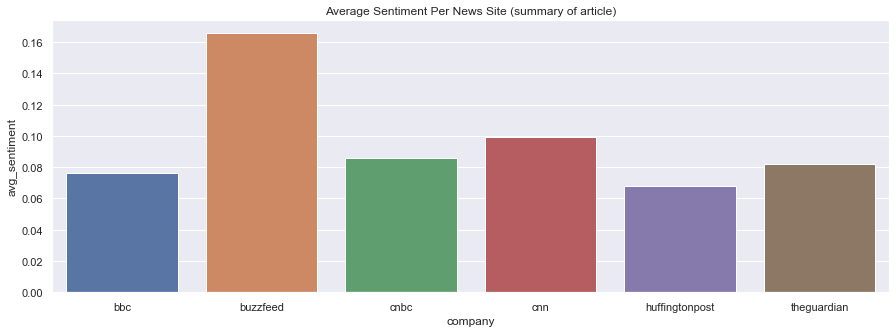

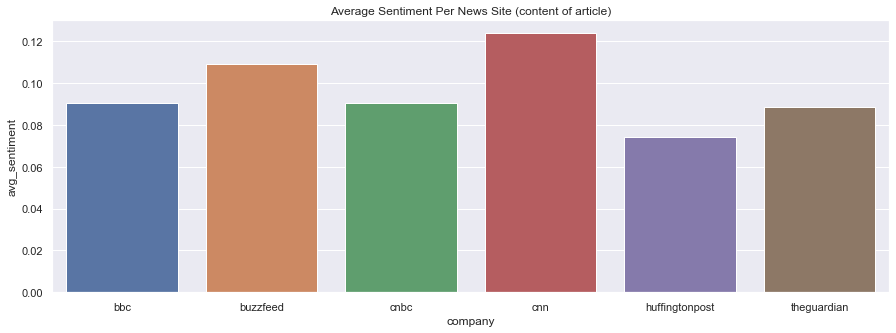

In [362]:
#1 and 2
#Average sentiment for each news site, summary and content 
#Summary
avg_sent_df = news_data.groupby('company')['sentiment_of_summary'].mean()
company = news_data.groupby('company')
company = list(company.groups.keys())
avg_sent = list(avg_sent_df)
avg_sent_df = pd.DataFrame(list(zip(company, avg_sent)), columns =['company', 'avg_sentiment']) 
avg_bar_plot = sns.barplot(x="company", y="avg_sentiment", data=avg_sent_df).set_title('Average Sentiment Per News Site (summary of article)')
#display the bar plot
plt.show()

#Content
avg_sent_df = news_data.groupby('company')['sentiment_of_content'].mean()
company = news_data.groupby('company')
company = list(company.groups.keys())
avg_sent = list(avg_sent_df)
avg_sent_df = pd.DataFrame(list(zip(company, avg_sent)), columns =['company', 'avg_sentiment']) 
avg_bar_plot = sns.barplot(x="company", y="avg_sentiment", data=avg_sent_df).set_title('Average Sentiment Per News Site (content of article)')
#display the bar plot
plt.show()

It seems that some news sites appear to have more positive than others. Even if we compare the average sentiment for summaries of the article and the gull content, we can still see that buzzffed seems to have more positive articles and that the huffington post appears to be less positive than the rest. 

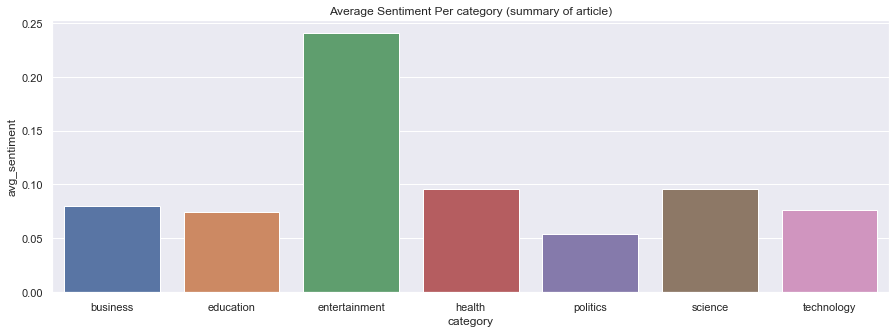

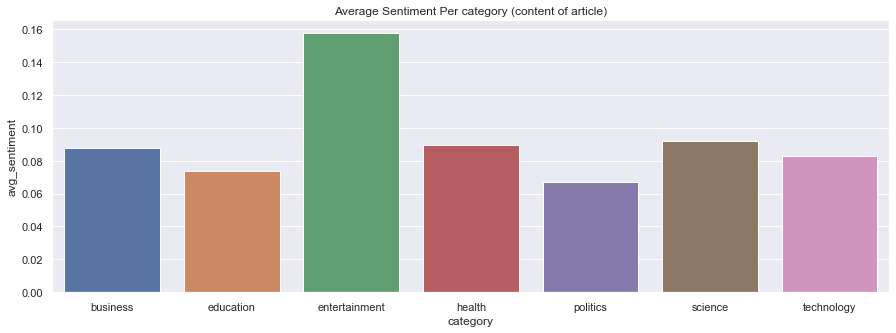

In [363]:
#3 and 4
#Average sentiment for each news category, summary and content 

#Summary
avg_sent_df = news_data.groupby('category')['sentiment_of_summary'].mean()
category = news_data.groupby('category')
category = list(category.groups.keys())
avg_sent = list(avg_sent_df)
avg_sent_df = pd.DataFrame(list(zip(category, avg_sent)), columns =['category', 'avg_sentiment']) 
avg_bar_plot = sns.barplot(x="category", y="avg_sentiment", data=avg_sent_df).set_title('Average Sentiment Per category (summary of article)')
#display the bar plot
plt.show()

#Content
avg_sent_df = news_data.groupby('category')['sentiment_of_content'].mean()
category = news_data.groupby('category')
category = list(category.groups.keys())
avg_sent = list(avg_sent_df)
avg_sent_df = pd.DataFrame(list(zip(category, avg_sent)), columns =['category', 'avg_sentiment']) 
avg_bar_plot = sns.barplot(x="category", y="avg_sentiment", data=avg_sent_df).set_title('Average Sentiment Per category (content of article)')
#display the bar plot
plt.show()

Looking at the sentiment averages by category, we see that the entertainment category appears to be more positive than the others. Politics appears to be the least positive category in the bunch. 

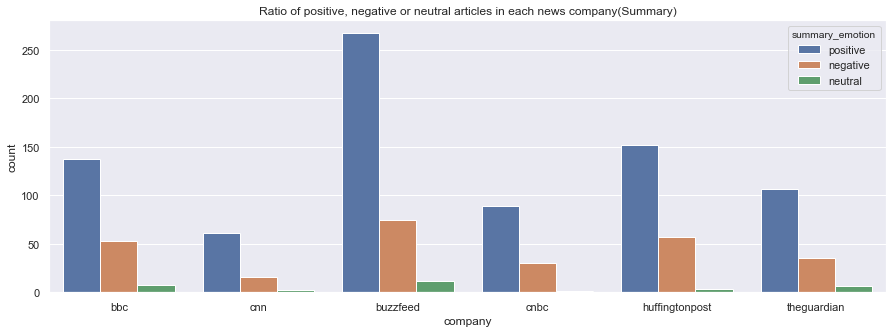

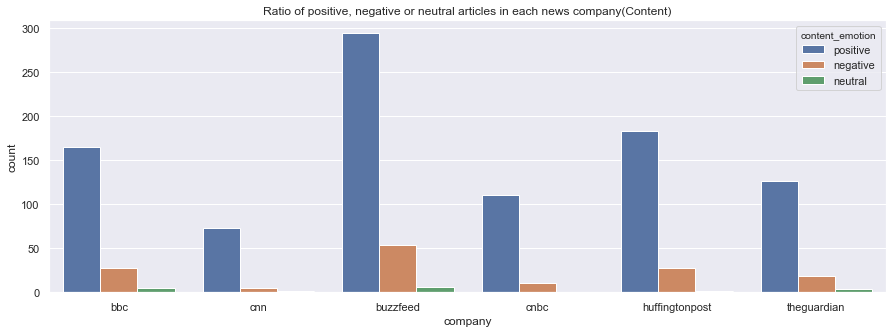

In [364]:
#5 and 6
#Bar plot : Ratio of positive, negative or neutral articles in each news company for article summary and content
#Summary
ax = sns.countplot(x="company", hue="summary_emotion", data=news_data).set_title("Ratio of positive, negative or neutral articles in each news company(Summary)")
plt.show()
#content
ax = sns.countplot(x="company", hue="content_emotion", data=news_data).set_title("Ratio of positive, negative or neutral articles in each news company(Content)")
plt.show()

We can see plotted above the number of positive, negative, and neutral articles. We see that every news site has significantly more news articles that are positve.

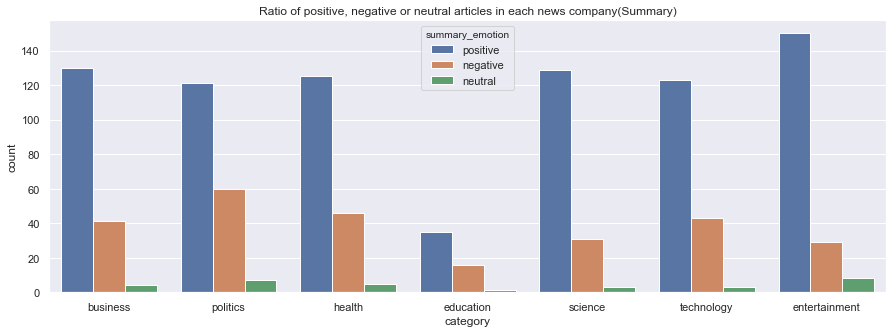

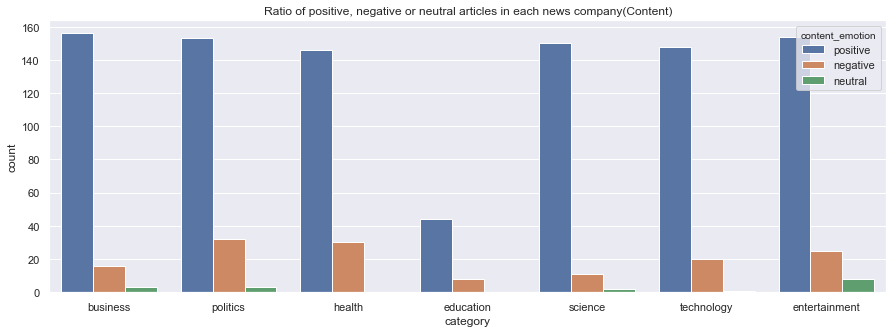

In [365]:
#3
#Bar plot : Ratio of positive, negative or neutral articles in each news category for article summary and content
#Summary
ax = sns.countplot(x="category", hue="summary_emotion", data=news_data).set_title("Ratio of positive, negative or neutral articles in each news company(Summary)")
plt.show()
#content
ax = sns.countplot(x="category", hue="content_emotion", data=news_data).set_title("Ratio of positive, negative or neutral articles in each news company(Content)")
plt.show()

Again, we see here that with all of the categories, there is a significantly higher proportion of positive articles. 

# Conclusion 

Data science involves many steps, and with each step there is a lot of work that needs to be done.
Here are the main steps : 
   1. Data collection
   2. Data processing
   3. Exploratory Analysis
   4. Data visualization
   5. Analysis, hypothesis testing, machine learning 
   6. Insight and policy decision 

What kinds of insight you can get for the data is up to you. There are many ways of analyzing data, and extracting various statistics from it. There are many machine learning algorithms to further analyze the data, and even make predictions for future data.
One idea I would like to work on to extend this project is text classification. Briefly put, we train a machine learning model with data on articles and what categories these articles belong to. Then when we give the model a article that is not categorized, it would predict what category the new article would belong to. An implementation of that would allow me scrape more than just rss feeds for certain news categories. I could potentially scrape any article on the internet and categorize it myself with the ML model.

Read more about text classification here:
* https://towardsdatascience.com/automated-text-classification-using-machine-learning-3df4f4f9570b

Note : The sample size was smaller than what I would have liked, but everytime this notebook it run, new articles are extracted from the Rss feeds. This means that the data is will change with every run of this notebook.